In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
ftrain=pd.read_excel("Data_Train.xlsx")

In [3]:
ftrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
ftrain.shape

(10683, 11)

In [5]:
ftrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
ftrain.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

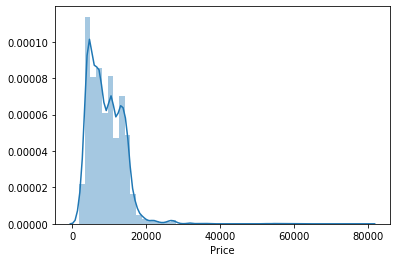

In [7]:
sns.distplot(ftrain["Price"])

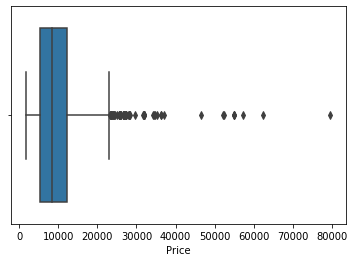

In [8]:
sns.boxplot(ftrain['Price'])

<function matplotlib.pyplot.show(*args, **kw)>

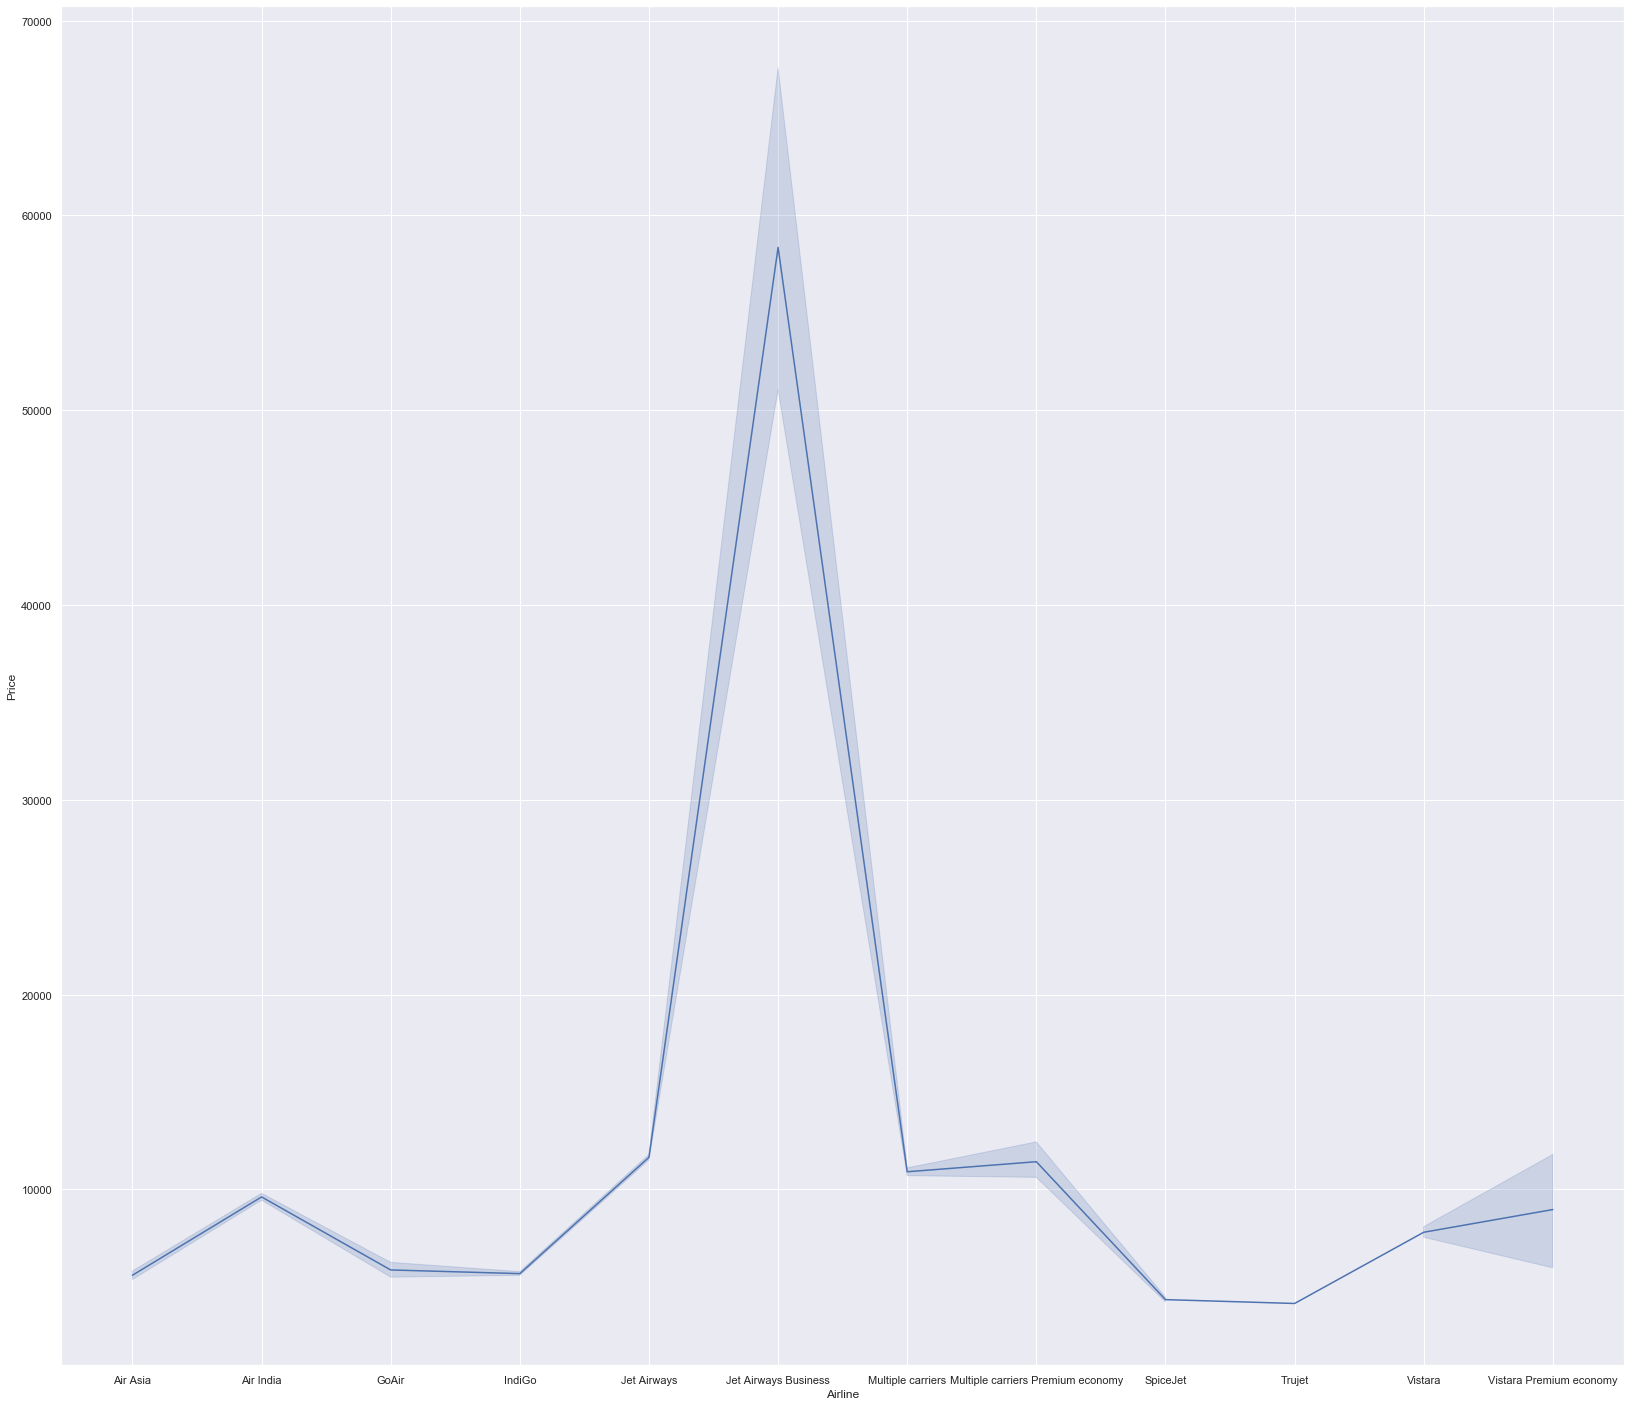

In [9]:
sns.set(rc={"figure.figsize":(28,25)})
sns.lineplot(x="Airline",y="Price",data=ftrain)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

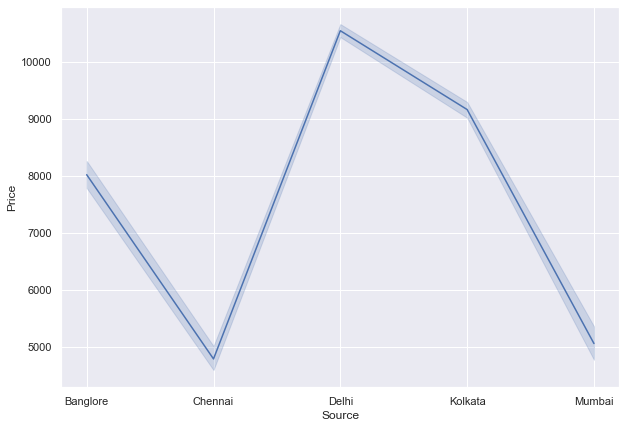

In [10]:
sns.set(rc={"figure.figsize":(10,7)})
sns.lineplot(x="Source",y="Price",data=ftrain)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

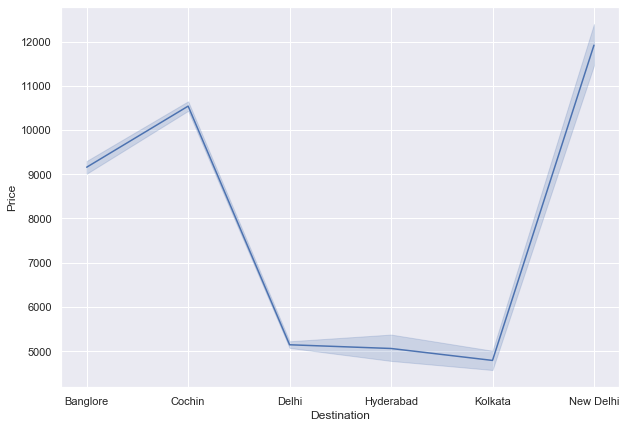

In [11]:
sns.set(rc={"figure.figsize":(10,7)})
sns.lineplot(x="Destination",y="Price",data=ftrain)
plt.show

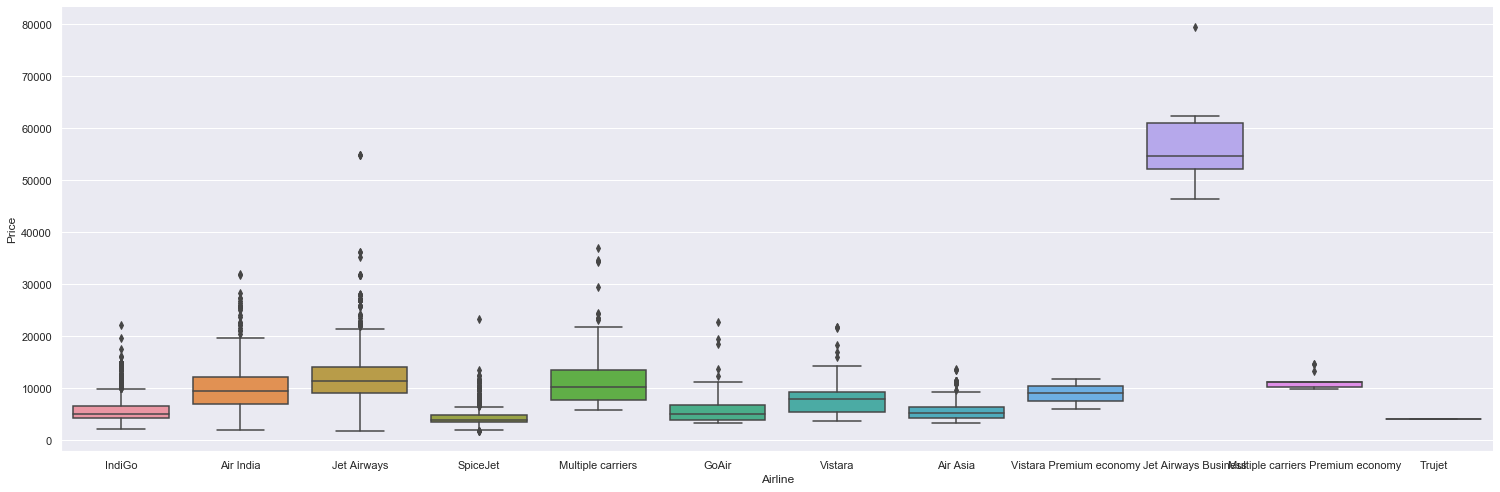

In [12]:
sns.catplot(x='Airline',y='Price',kind='box',data=ftrain,height=7,aspect=3)

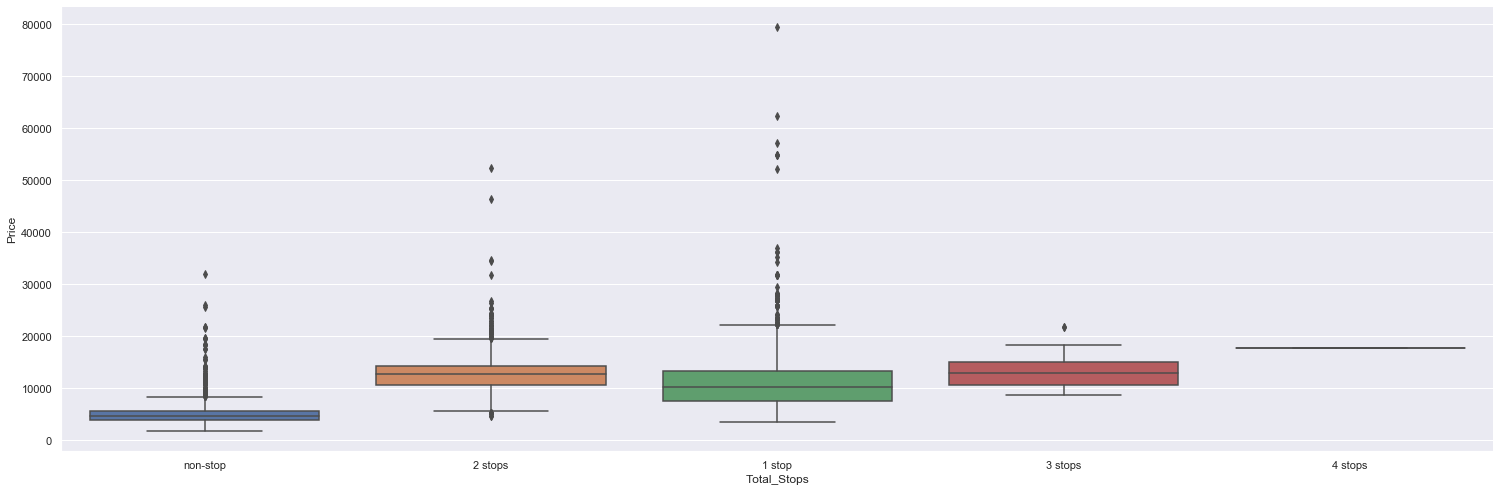

In [13]:
sns.catplot(x='Total_Stops',y='Price',kind='box',data=ftrain,height=7,aspect=3)

<function matplotlib.pyplot.show(*args, **kw)>

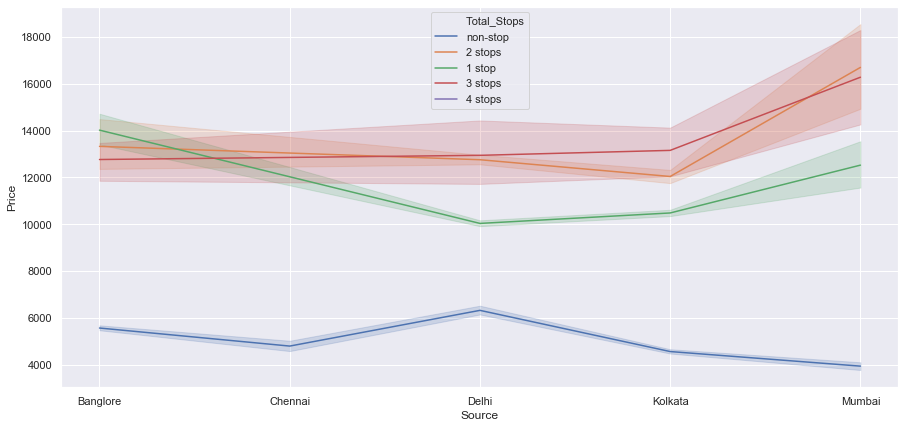

In [14]:
sns.set(rc={"figure.figsize":(15,7)})
sns.lineplot(x="Source",y="Price",hue="Total_Stops",data=ftrain)
plt.show

In [15]:
ftest=pd.read_excel("Test_set.xlsx")
ftest.shape

(2671, 10)

In [16]:
flight=pd.concat([ftrain,ftest])
flight.shape

(13354, 11)

In [17]:
flight.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [18]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              10683 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [19]:
#Additional information

flight['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [20]:
flight['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

In [21]:
#AIRLINE
flight['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
#ARRIVAL TIME

flight['Arrival_Time']=flight['Arrival_Time'].str.split(' ').str[0]
flight['Arrival_Hour']=flight['Arrival_Time'].str.split(':').str[0]
flight['Arrival_Minute']=flight['Arrival_Time'].str.split(':').str[1]
flight.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
#DATE OF JOURNEY

flight['Date_of_journey']=flight['Date_of_Journey'].str.split('/').str[0]
flight['Month_of_journey']=flight['Date_of_Journey'].str.split('/').str[1]
flight['Year_of_journey']=flight['Date_of_Journey'].str.split('/').str[2]
flight.drop(['Date_of_Journey'],axis=1,inplace=True)

In [24]:
#DEPARTURE TIME

flight['Dep_Hour']=flight['Dep_Time'].str.split(':').str[0]
flight['Dep_Minute']=flight['Dep_Time'].str.split(':').str[1]
flight.drop(['Dep_Time'],axis=1,inplace=True)

In [25]:
#DESTINATION

flight['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [26]:
#DURATION

flight['Duration_hour']=flight['Duration'].str.split('h').str[0]

In [27]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

flight['Duration_hour']=flight['Duration_hour'].apply(lambda x:change(x))

In [28]:
flight['Duration']=flight['Duration'].str.split(' ').str[1]
flight['Duration_minute']=flight['Duration'].str.split('m').str[0]
flight['Duration_minute'].fillna('0',inplace=True)
flight.drop(['Duration'],axis=1,inplace=True)

In [29]:
#ROUTE

flight['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BLR → HBX → BOM → AMD → DEL       1
CCU → IXB → DEL → BLR             1
BOM → BLR → CCU → BBI → HYD       1
BOM → IXC → DEL → HYD             1
BOM → NDC → HYD                   1
Name: Route, Length: 132, dtype: int64

In [30]:
flight['Route_1']=flight['Route'].str.split('→ ').str[0]
flight['Route_2']=flight['Route'].str.split('→ ').str[1]
flight['Route_3']=flight['Route'].str.split('→ ').str[2]
flight['Route_4']=flight['Route'].str.split('→ ').str[3]
flight['Route_5']=flight['Route'].str.split('→ ').str[4]
flight.drop(['Route'],axis=1,inplace=True)

In [31]:
flight['Route_1'].fillna('None',inplace=True)
flight['Route_2'].fillna('None',inplace=True)
flight['Route_3'].fillna('None',inplace=True)
flight['Route_4'].fillna('None',inplace=True)
flight['Route_5'].fillna('None',inplace=True)

In [32]:
#SOURCE

flight['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [33]:
#TOTAL STOP

flight['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [34]:
flight['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)

In [35]:
flight['Stops']=flight['Total_Stops'].str.split(' ').str[0]

In [36]:
flight['Stops'].isnull().sum()

1

In [37]:
flight['Stops'].fillna('0',inplace=True)

In [38]:
flight['Stops']=flight['Stops'].astype(int)
flight.drop(['Total_Stops'],axis=1,inplace=True)

In [39]:
flight.head()

,Additional_Info,Airline,Destination,Price,Source,Arrival_Hour,Arrival_Minute,Date_of_journey,Month_of_journey,Year_of_journey,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Stops
0,No info,IndiGo,New Delhi,3897.0,Banglore,01,10,24,03,2019,22,20,2,50,BLR,DEL,None,None,None,0
1,No info,Air India,Banglore,7662.0,Kolkata,13,15,1,05,2019,05,50,7,25,CCU,IXR,BBI,BLR,None,2
2,No info,Jet Airways,Cochin,13882.0,Delhi,04,25,9,06,2019,09,25,19,0,DEL,LKO,BOM,COK,None,2
3,No info,IndiGo,Banglore,6218.0,Kolkata,23,30,12,05,2019,18,05,5,25,CCU,NAG,BLR,None,None,1
4,No info,IndiGo,New Delhi,13302.0,Banglore,21,35,01,03,2019,16,50,4,45,BLR,NAG,DEL,None,None,1


In [40]:
flight['Date_of_journey']=flight['Date_of_journey'].astype(int)
flight['Month_of_journey']=flight['Month_of_journey'].astype(int)
flight['Year_of_journey']=flight['Year_of_journey'].astype(int)
flight['Arrival_Hour']=flight['Arrival_Hour'].astype(int)
flight['Arrival_Minute']=flight['Arrival_Minute'].astype(int)
flight['Dep_Hour']=flight['Dep_Hour'].astype(int)
flight['Dep_Minute']=flight['Dep_Minute'].astype(int)
flight['Duration_hour']=flight['Duration_hour'].astype(int)
flight['Duration_minute']=flight['Duration_minute'].astype(int)

In [41]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
Additional_Info     13354 non-null object
Airline             13354 non-null object
Destination         13354 non-null object
Price               10683 non-null float64
Source              13354 non-null object
Arrival_Hour        13354 non-null int32
Arrival_Minute      13354 non-null int32
Date_of_journey     13354 non-null int32
Month_of_journey    13354 non-null int32
Year_of_journey     13354 non-null int32
Dep_Hour            13354 non-null int32
Dep_Minute          13354 non-null int32
Duration_hour       13354 non-null int32
Duration_minute     13354 non-null int32
Route_1             13354 non-null object
Route_2             13354 non-null object
Route_3             13354 non-null object
Route_4             13354 non-null object
Route_5             13354 non-null object
Stops               13354 non-null int32
dtypes: float64(1), int32(10), object(9)
memory usage: 1.6+ M

In [42]:
#PRICE

flight.isna().sum()

Additional_Info        0
Airline                0
Destination            0
Price               2671
Source                 0
Arrival_Hour           0
Arrival_Minute         0
Date_of_journey        0
Month_of_journey       0
Year_of_journey        0
Dep_Hour               0
Dep_Minute             0
Duration_hour          0
Duration_minute        0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
Stops                  0
dtype: int64

In [43]:
flight['Price'].fillna(flight['Price'].mean(),inplace=True)
flight['Price']

0        3897.000000
1        7662.000000
2       13882.000000
3        6218.000000
4       13302.000000
            ...     
2666     9087.064121
2667     9087.064121
2668     9087.064121
2669     9087.064121
2670     9087.064121
Name: Price, Length: 13354, dtype: float64

In [44]:
flight['Price']=(flight['Price']-flight['Price'].min())/(flight['Price'].max()-flight['Price'].min())

In [45]:
flight['Price']

0       0.027497
1       0.075920
2       0.155917
3       0.057348
4       0.148457
          ...   
2666    0.094248
2667    0.094248
2668    0.094248
2669    0.094248
2670    0.094248
Name: Price, Length: 13354, dtype: float64

In [46]:
flight.isna().sum()

Additional_Info     0
Airline             0
Destination         0
Price               0
Source              0
Arrival_Hour        0
Arrival_Minute      0
Date_of_journey     0
Month_of_journey    0
Year_of_journey     0
Dep_Hour            0
Dep_Minute          0
Duration_hour       0
Duration_minute     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Stops               0
dtype: int64

In [47]:
df=flight.select_dtypes(include=[np.object])
df.columns

Index(['Additional_Info', 'Airline', 'Destination', 'Source', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['Additional_Info', 'Airline', 'Destination', 'Source', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5']
for val in cat:
    le=LabelEncoder()
    flight[val]=le.fit_transform(flight[val].astype("str"))
flight.dtypes

Additional_Info       int32
Airline               int32
Destination           int32
Price               float64
Source                int32
Arrival_Hour          int32
Arrival_Minute        int32
Date_of_journey       int32
Month_of_journey      int32
Year_of_journey       int32
Dep_Hour              int32
Dep_Minute            int32
Duration_hour         int32
Duration_minute       int32
Route_1               int32
Route_2               int32
Route_3               int32
Route_4               int32
Route_5               int32
Stops                 int32
dtype: object

In [49]:
flight.head()

,Additional_Info,Airline,Destination,Price,Source,Arrival_Hour,Arrival_Minute,Date_of_journey,Month_of_journey,Year_of_journey,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Stops
0,7,3,5,0.027497,0,1,10,24,3,2019,22,20,2,50,0,13,24,12,4,0
1,7,1,0,0.075920,3,13,15,1,5,2019,5,50,7,25,2,25,1,3,4,2
2,7,4,1,0.155917,2,4,25,9,6,2019,9,25,19,0,3,32,4,5,4,2
3,7,3,0,0.057348,3,23,30,12,5,2019,18,5,5,25,2,34,3,12,4,1
4,7,3,5,0.148457,0,21,35,1,3,2019,16,50,4,45,0,34,8,12,4,1


In [50]:
X= flight.drop(['Price'], axis = 1)
print(X.shape)

(13354, 19)


In [51]:
y =flight['Price'] 
print(y.shape)

(13354,)


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [54]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [55]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [56]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.4041478206269983
MSE:  0.0015699502695199904
Cross Validation:  0.3784877807052351


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.0002609309336851773
MSE:  0.002635485733663172
Cross Validation:  0.1992109720911598


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.0002609309336851773
MSE:  0.002635485733663172
Cross Validation:  0.1992109720911598


------------------- Ridge(alpha=1.0, copy_X=True, fit_intercep

I Choose GradientBoostingRegressor as my final model because it perform very well on our dataset and also has 
less Mean_Squared_Error and Good Cross_val_score

R2_score:  0.6458282363862394

MSE:  0.0009331711370543117

Cross Validation:  0.6187403250897928



In [59]:
from sklearn.externals import joblib

joblib.dump(gb,'flight_joblib')

['flight_joblib']